**Question 2**

**Accuracy**
Medical Screening Tools: Doctors want to be able to accurately detect signs of the presence of disease and sickness, or the lack thereof. Using an accuracy metric to measure the proportion of true positives and true negatives that their tools predict is crucial to medical services, as it allows them to be more confident in the results that they predict. You do not want your doctor being unsure of a diagnosis because they cannot be sure if their tool properly reports negative and/or positive signs of illness.

**Sensitivity**
Smoke Alarm: Since they function as a warning to the presence of fire and smoke, you would want them to properly function ***every*** time there is fire and smoke. Using a sensitivity metric to measure the proportion of true positives detected by the smoke alarm is important, because if a smoke alarm can detect the presence of fire and/or smoke a vast majority of the time, then it is doing its intended purpose. Usually the drawback of having such consistency is that they becomes *too* consistent, as in they have a tendency of reporting false positives. Better safe than sorry is their whole point.

**Specificity**
Fraud Detection Systems for Banks: In order to keep their clients signed on, banks need to ensure that their fraud detection systems do not annoy clients by unjustifiably flag their transactions as fraudulent. 

**Precision**
Weather Models: The whole point of weather models is to accurately predict the weather. I believe the weather metric to be best suited for weather models because a weather model that positively identifies the right weather a majority of the time is the most ideal model. A weather model that correctly predicts the right weather conidtions most of the time is not the same as a weather model whose majority of predictions are correct. A weather model that is too sensitive is useless, hence why it would be useful to measure how much of its positive predictions are actually correct.

In [1]:
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, recall_score, make_scorer
import graphviz as gv

url = "https://raw.githubusercontent.com/pointOfive/STA130_F23/main/Data/amazonbooks.csv"
ab = pd.read_csv(url, encoding="ISO-8859-1")
# create `ab_reduced_noNaN` based on the specs above
ab_reduced = ab.drop(['Weight_oz', 'Width', 'Height'], axis=1)

# Create 'ab_reduced_noNaN' by removing rows with NaN entries
ab_reduced_noNaN = ab_reduced.dropna() 

# Set 'Pub year' and 'NumPages' to integer
ab_reduced_noNaN['Pub year'] = ab_reduced_noNaN['Pub year'].astype('int')
ab_reduced_noNaN['NumPages'] = ab_reduced_noNaN['NumPages'].astype('int')

# Set 'Hard_or_Paper' to category
ab_reduced_noNaN['Hard_or_Paper'] = ab_reduced_noNaN['Hard_or_Paper'].astype('category') 

/tmp/ipykernel_233/4056268635.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ab_reduced_noNaN['Pub year'] = ab_reduced_noNaN['Pub year'].astype('int')
/tmp/ipykernel_233/4056268635.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ab_reduced_noNaN['NumPages'] = ab_reduced_noNaN['NumPages'].astype('int')
/tmp/ipykernel_233/4056268635.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cave

**Question 4**

In [2]:
np.random.seed(255) # set random seed for reproducibility

# Create training set (80% of data)
ab_reduced_noNaN_train = ab_reduced_noNaN.sample(frac=0.8)

# Create testing set (remaining 20% of data)
ab_reduced_noNaN_test = ab_reduced_noNaN.drop(ab_reduced_noNaN_train.index) 

In [3]:
y = pd.get_dummies(ab_reduced_noNaN_train["Hard_or_Paper"])['H']
X = ab_reduced_noNaN_train[['List Price']]

In [4]:
from sklearn.tree import DecisionTreeClassifier

# Create DecisionTreeClassifier object with max_depth=2
clf = DecisionTreeClassifier(max_depth=2)

# Fit the model to the training data
clf.fit(X, y)

DecisionTreeClassifier(max_depth=2)

[Text(0.5, 0.8333333333333334, 'x[0] <= 17.97\ngini = 0.398\nsamples = 255\nvalue = [185, 70]'),
 Text(0.25, 0.5, 'x[0] <= 9.47\ngini = 0.198\nsamples = 179\nvalue = [159, 20]'),
 Text(0.125, 0.16666666666666666, 'gini = 0.382\nsamples = 35\nvalue = [26, 9]'),
 Text(0.375, 0.16666666666666666, 'gini = 0.141\nsamples = 144\nvalue = [133, 11]'),
 Text(0.75, 0.5, 'x[0] <= 29.225\ngini = 0.45\nsamples = 76\nvalue = [26, 50]'),
 Text(0.625, 0.16666666666666666, 'gini = 0.379\nsamples = 59\nvalue = [15, 44]'),
 Text(0.875, 0.16666666666666666, 'gini = 0.457\nsamples = 17\nvalue = [11, 6]')]

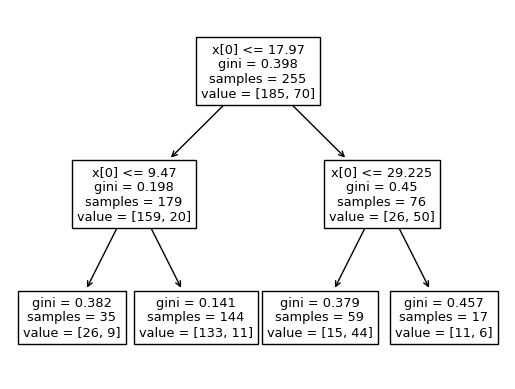

In [5]:
tree.plot_tree(clf)

The fitted clf model predicts that books less than or equal to $17.97 and books greater than $35.38 are paper cover, while books between $17.97 and $35.38 are hard cover.

**Question 5:**

In [6]:
X = ab_reduced_noNaN_train[['NumPages', 'Thick', 'List Price']]
y = pd.get_dummies(ab_reduced_noNaN_train["Hard_or_Paper"])['H']

In [7]:
# Create DecisionTreeClassifier object with max_depth=2
clf2 = DecisionTreeClassifier(max_depth=4)

# Fit the model to the training data
clf2.fit(X, y)

DecisionTreeClassifier(max_depth=4)

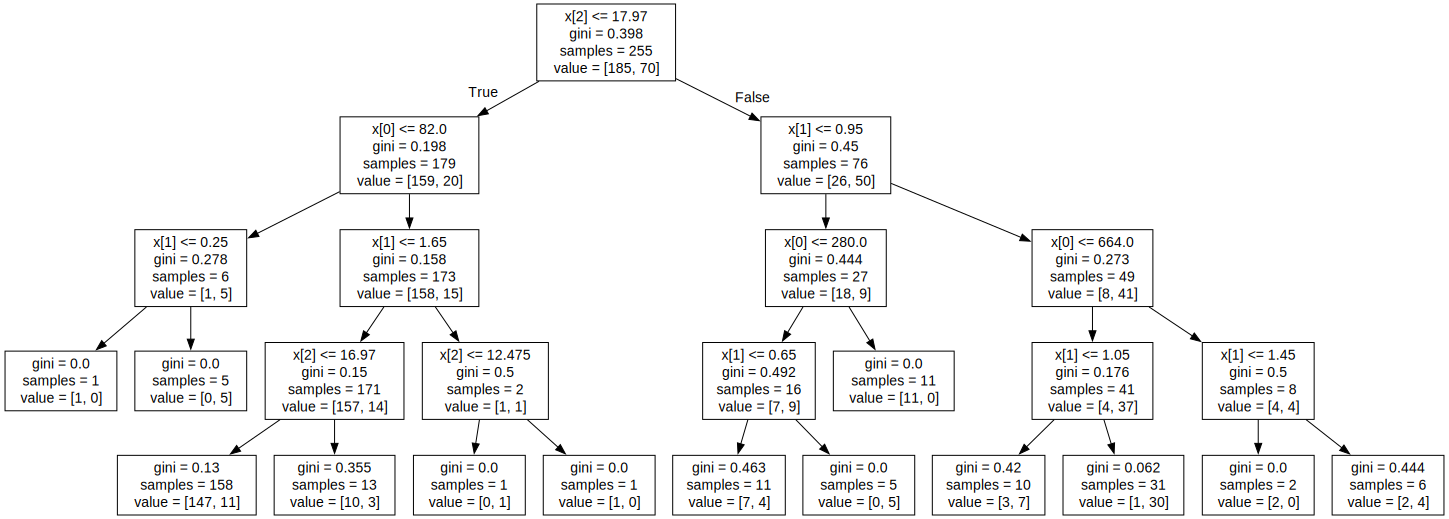

In [8]:
import graphviz 
dot_data = tree.export_graphviz(clf2, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("iris") 
graph

The root node first checks if the book is less than or equal to $17.97, after which the other predictors are examined more extensively, with price only reoccuring on the subsequent left nodes once and none on the right nodes. The predictions made from the model put more emphasis on the thickness and length of the book, with the model appearing to predict that the more expensive, lengthier, and thicker books are hard-cover, while the cheaper books are paper for the most part.

**Question 6**

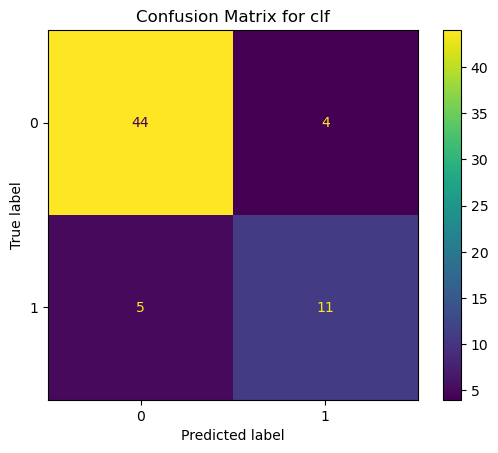

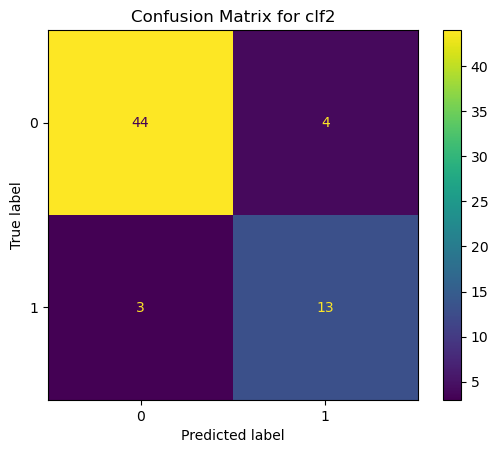

Metrics for clf:
Sensitivity: 0.688
Specificity: 0.917
Accuracy: 0.859

Metrics for clf2:
Sensitivity: 0.812
Specificity: 0.917
Accuracy: 0.891


In [19]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score

# --- Define X1_test, X2_test, and y_test ---
X1_test = ab_reduced_noNaN_test[['List Price']]
X2_test = ab_reduced_noNaN_test[['NumPages', 'Thick', 'List Price']]
y_test = pd.get_dummies(ab_reduced_noNaN_test["Hard_or_Paper"])['H']

# --- Predictions and Confusion Matrices ---
y_test_pred_clf = clf.predict(X1_test)
y_test_pred_clf2 = clf2.predict(X2_test)

cm_clf = confusion_matrix(y_test, y_test_pred_clf)
cm_clf2 = confusion_matrix(y_test, y_test_pred_clf2)

# --- Display Confusion Matrices ---
disp_clf = ConfusionMatrixDisplay(confusion_matrix=cm_clf)
disp_clf.plot()
plt.title("Confusion Matrix for clf")
plt.show()

disp_clf2 = ConfusionMatrixDisplay(confusion_matrix=cm_clf2)
disp_clf2.plot()
plt.title("Confusion Matrix for clf2")
plt.show()

# --- Calculate Metrics ---
def calculate_metrics(cm):
    TN, FP, FN, TP = cm.ravel()  # Extract individual elements from the confusion matrix
    sensitivity = TP / (TP + FN)  # True Positive Rate
    specificity = TN / (TN + FP)  # True Negative Rate
    accuracy = (TP + TN) / (TP + TN + FP + FN)  # Overall accuracy
    return sensitivity, specificity, accuracy

sensitivity_clf, specificity_clf, accuracy_clf = calculate_metrics(cm_clf)
sensitivity_clf2, specificity_clf2, accuracy_clf2 = calculate_metrics(cm_clf2)

# --- Print Metrics ---
print(f"Metrics for clf:\nSensitivity: {sensitivity_clf:.3f}\nSpecificity: {specificity_clf:.3f}\nAccuracy: {accuracy_clf:.3f}")
print(f"\nMetrics for clf2:\nSensitivity: {sensitivity_clf2:.3f}\nSpecificity: {specificity_clf2:.3f}\nAccuracy: {accuracy_clf2:.3f}")

**Question 7**

In [20]:
print(ab_reduced_noNaN_train.dtypes)
print(type(clf.predict(ab_reduced_noNaN_train[['List Price']])))


Title              object
Author             object
List Price        float64
Amazon Price      float64
Hard_or_Paper    category
NumPages            int64
Publisher          object
Pub year            int64
ISBN-10            object
Thick             float64
dtype: object
<class 'numpy.ndarray'>


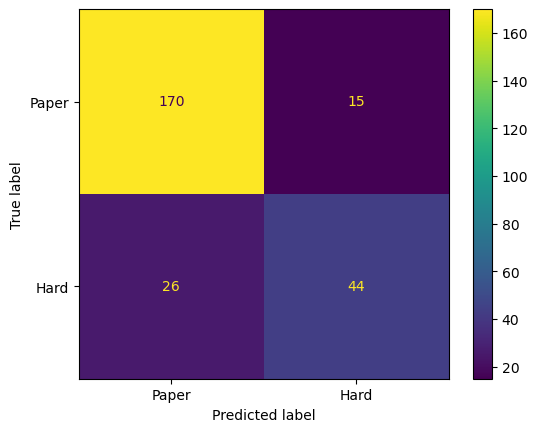

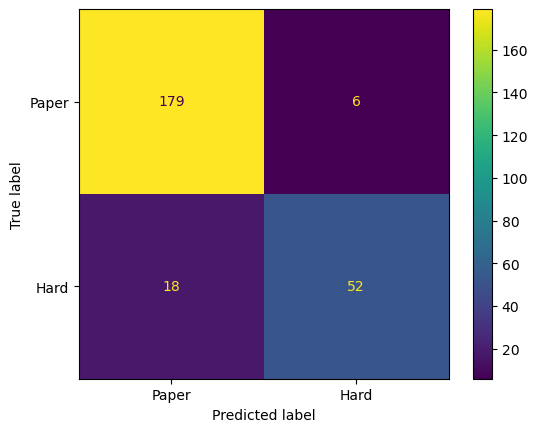

In [21]:
ConfusionMatrixDisplay(
    confusion_matrix((ab_reduced_noNaN_train["Hard_or_Paper"]=='H'), 
                     clf.predict(ab_reduced_noNaN_train[['List Price']]), 
                     labels=[0, 1]), display_labels=["Paper","Hard"]).plot()
ConfusionMatrixDisplay(
    confusion_matrix((ab_reduced_noNaN_train["Hard_or_Paper"]=='H'), 
                     clf2.predict(
                         ab_reduced_noNaN_train[['NumPages','Thick','List Price']]), 
                     labels=[0, 1]), display_labels=["Paper","Hard"]).plot()

The difference between the two example confusion matrices is that the upper one is based on a model created from the training set only based on the list price predictor, while the lower one is based on a model that employs additional predictors, that being NumPages and Thick.

Both of the example confusion matrices compare their predictions to the labels of the training dataset, which was the dataset that they were trained on.

The reason why the two confusion matrices we made earlier are better than these ones is because the while models themselves were based on the training dataset, their predictive capabilities were tested on the testing dataset. The example matrices here compare their predictions to the same dataset they were generated from, which obscures us from analyzing the two models ability to generalize new data. The models *could* be good a generalizing, but its also possible that they are overfit to the training dataset; we just cannot tell with the given matrices.

**Chatlogs**

***ChatGPT***
Sure! Here's a summary of our discussion:

1. **Confusion Matrices Comparison**: We discussed how two confusion matrices were being plotted. The first set of matrices was for models `clf` and `clf2`, which were trained and evaluated on the correct target variable (`Hard_or_Paper`). The second set was misleading because it evaluated predictions for `Hard_or_Paper` against an unrelated variable (`life_exp_good`), which caused irrelevant results.

2. **Target Variables and Evaluation**: We clarified that `life_exp_good` is an attribute (not the target variable), and the confusion matrices for `clf` and `clf2` were meaningful because they were aligned with the actual target variable (`Hard_or_Paper`), whereas the other matrices were problematic due to the target mismatch.

3. **Metrics for clf and clf2**: We also discussed how `clf` and `clf2` produced better performance metrics (like accuracy, sensitivity, and specificity) because they were evaluated on the correct target, whereas the other matrices led to confusion due to a mismatch between the predicted and true labels.

Let me know if you'd like further clarification on any point!

https://chatgpt.com/share/673eae1a-66a4-8003-a988-605310a29bb8

***NotebookLM***

Chat History Summary: Decision Trees, Confusion Matrices, and Model Evaluation

Our conversation has centred around building and evaluating classification models, specifically decision trees, using the "amazon books dataset," though the sources don't explicitly name this dataset. We've focused on using Python code, particularly the scikit-learn library, to create and assess these models.

**Key Concepts and Insights:**

* **Decision Trees:** We discussed the concept of decision trees as a method for classifying data. Decision trees use a tree-like structure to make predictions based on a series of rules derived from the training data. Key concepts include:
    * **Root Node:** The starting point of the tree, where the first decision rule is applied.
    * **Branches:** Represent the possible outcomes based on decision rules.
    * **Nodes:** Points within the tree where decisions are made based on predictor variables.
    * **Terminal Nodes/Leaves:** Endpoints of the tree representing final predictions.
    * **Gini Impurity:** A measure used to assess the purity of nodes during tree construction. A lower Gini impurity indicates a more homogenous group of data points at that node.
    * **Max Depth:** A parameter that controls the maximum depth (number of levels) of the decision tree, influencing model complexity and the potential for overfitting.
* **Confusion Matrices:** We explored the use of confusion matrices to evaluate the performance of classification models. Confusion matrices are tables that show the counts of true positives, true negatives, false positives, and false negatives, providing a visual and numerical representation of model accuracy.
    * **True Positives (TP):** The model correctly predicts the positive class.
    * **True Negatives (TN):** The model correctly predicts the negative class.
    * **False Positives (FP):** The model incorrectly predicts the positive class when the actual class is negative.
    * **False Negatives (FN):** The model incorrectly predicts the negative class when the actual class is positive.
    * **Visual Interpretation:** Colours within the matrix can represent the magnitude of each outcome category, helping to visually identify patterns and potential issues like class imbalance or model bias.
* **Model Evaluation:** We discussed the importance of using a separate test dataset (ab_reduced_noNaN_test) to evaluate model performance on unseen data. Evaluating on the training data can lead to overly optimistic results due to overfitting. Metrics like sensitivity, specificity, and accuracy can be calculated from the confusion matrix to quantify different aspects of model performance. 
    * **Sensitivity:** Measures how well the model correctly identifies positive cases.
    * **Specificity:** Measures how well the model correctly identifies negative cases.
    * **Accuracy:** Measures the overall correctness of the model's predictions.

**Specific Code Examples and Discussions:**

* **Preparing Data:** We covered code snippets for creating predictor and outcome variables based on the "amazon books dataset," using functions like `pd.get_dummies` to convert categorical variables into a suitable format for classification.
* **Train-Test Split:** We used the `train_test_split` function from scikit-learn to divide the data into training and testing sets, a crucial step for evaluating model generalization.
* **Building Decision Tree Classifiers:** We discussed code for creating decision tree classifiers using `DecisionTreeClassifier`, highlighting the importance of the `max_depth` parameter and its impact on model complexity and overfitting.
* **Generating Confusion Matrices:** We used the `confusion_matrix` function from scikit-learn to create confusion matrices for evaluating model performance.
* **Calculating Metrics:** We defined functions to calculate sensitivity, specificity, and accuracy based on the values from the confusion matrix.

**Unresolved Issues:**

* The variable "life_exp_good" was used in some code snippets, but its meaning and purpose within the "amazon books dataset" remain undefined by the sources. Further investigation of the dataset or its documentation is needed to clarify its role and impact on model interpretation.

**Overall, our conversation has covered essential concepts related to decision trees, confusion matrices, and model evaluation, providing a foundation for building and assessing classification models.** The unresolved issue regarding the "life_exp_good" variable highlights the importance of thoroughly understanding the data and the target variable to properly interpret model results. Remember that the goal is not only to build a model that performs well on the training data, but also to ensure it generalizes effectively to new, unseen data, a key principle emphasized throughout the sources and our discussions.